# Associative memory

In [78]:
import numpy as np
import matplotlib.pyplot as plt
ran_seed = 42

n = 25
v_s = [np.full((n, n), -1, dtype='float64') for _ in range(3)]  # this is the stable state we wanna achive
"""v_s is an array of memories"""

# defining v_s
for i in range(n):
    for j in range(n):
        # circle
        if (i - n/2)**2 + (j - n/2)**2 <= (n/4)**2:
            v_s[0][i, j] = 1
        
        # cross
        if j - i == 0 or i + j == (n-1):
            v_s[1][i, j] = 1
        
        # square
        side = 5
        if i-n//4 in range(n//2 - side, n//2 + side + 1) and j-n//4 in range(n//2 - side, n//2 + side + 1):
            v_s[2][i, j] = 1

v_s[0] = v_s[0].reshape(1, -1)
v_s[1] = v_s[1].reshape(1, -1)
v_s[2] = v_s[2].reshape(1, -1)

In [79]:
def show_brain(flat_arr, n):
    image = flat_arr.reshape((n,n))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

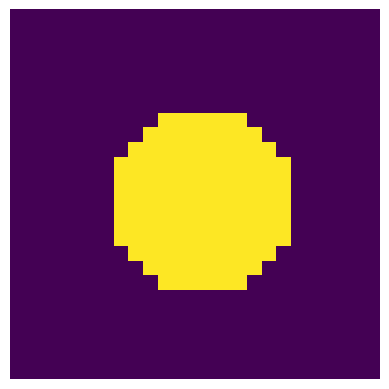

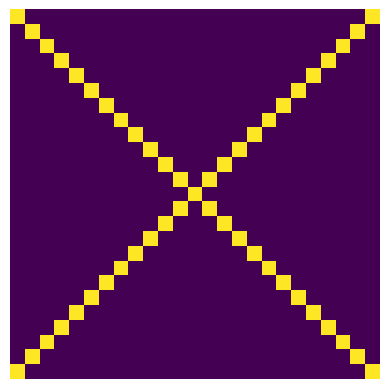

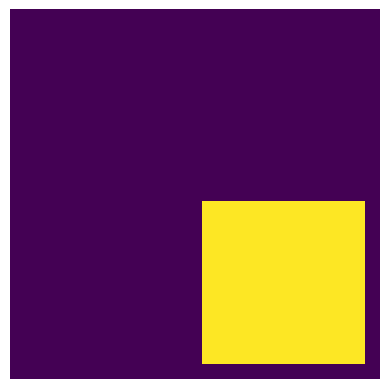

In [80]:
show_brain(v_s[0], n)
show_brain(v_s[1], n)
show_brain(v_s[2], n)

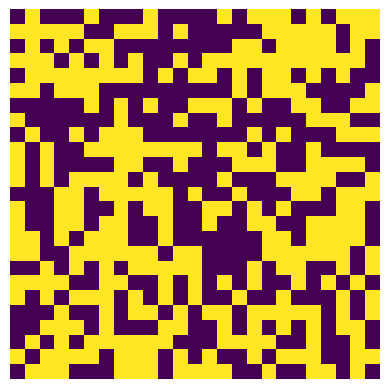

In [81]:
np.random.seed(ran_seed)
v = []
v.append(np.random.choice([-1, 1], (1,n**2)))

show_brain(v[0], n)

In [82]:
def g(z):
    if z >= 0:
        return 1
    else:
        return -1

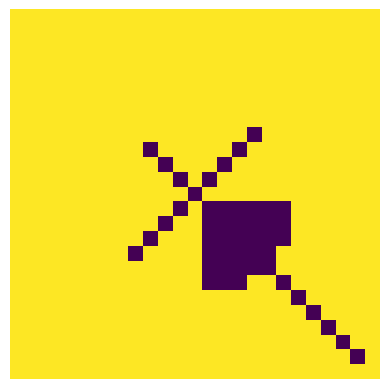

In [83]:
# np.random.seed(ran_seed)
# w = np.random.uniform(-0.01, 0.01, (n**2,n**2))
# np.fill_diagonal(w, 0)

w = np.matmul(v_s[0].T, v_s[0])

for i in range(1, len(v_s)):
    w += np.matmul(v_s[i].T, v_s[i])

w /= len(v_s)
np.fill_diagonal(w, 0)

order = np.arange(n**2)
np.random.shuffle(order)

for i in order:
    v_next = v[-1].copy()
    z = np.dot(w[i, :], v[-1].T)
    v_next[0, i] = g(z)
    v.append(v_next)

show_brain(v[-1], n)

In [84]:
# # make a vid out of list "v"

# from matplotlib.animation import FuncAnimation

# # Create a figure and axis
# fig, ax = plt.subplots()

# # Define the animation function
# def update(i):
#     # Clear the axis
#     ax.clear()
#     # Plot the i-th image in the list
#     ax.imshow(v[i].reshape(n,n), cmap='gray')

# # Create the animation
# anim = FuncAnimation(fig, update, frames=len(v), interval=20)

# # Save the animation as a GIF file
# anim.save('5. animation.gif', writer='imagemagick')